In [1]:
import mpl_finance as mpf
import matplotlib
import datetime
import matplotlib.pyplot as plt
from matplotlib.pylab import date2num 
import pandas as pd
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 数据获取

In [2]:
#以贵州茅台为例--600519.SH
import tushare as ts
pro=ts.pro_api('5f2dc9d17ebed3601a4fbea74148a25067d067138bf88515693e9b7d')
quotes=pro.daily(ts_code='600519.SH', start_date='20180101', end_date='20190101',fields=('trade_date','open','close','high','low','vol','ts_code'))
quotes['trade_date']=pd.to_datetime(quotes['trade_date'])
quotes.set_index('trade_date',inplace=True)     #将日期变成列索引，有利于后期x轴刻度的调整
quotes.sort_index(ascending=True,inplace=True)     #正序排序
quotes.head()

,ts_code,open,high,low,close,vol
trade_date,,,,,,
2018-01-02,600519.SH,700.00,710.16,689.89,703.85,49612.48
2018-01-03,600519.SH,701.50,721.40,699.74,715.86,52019.41
2018-01-04,600519.SH,721.40,743.50,719.33,737.07,72205.08
2018-01-05,600519.SH,741.00,746.03,728.22,738.36,39989.07
2018-01-08,600519.SH,735.02,756.50,735.02,752.13,52204.56


In [28]:
quotes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2018-01-02 to 2018-12-28
Data columns (total 7 columns):
ts_code    243 non-null object
open       243 non-null float64
high       243 non-null float64
low        243 non-null float64
close      243 non-null float64
vol        243 non-null float64
ret        243 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 25.2+ KB


# 可视化收盘价

Text(0.5, 0, '日期')

Text(0, 0.5, '收盘价')

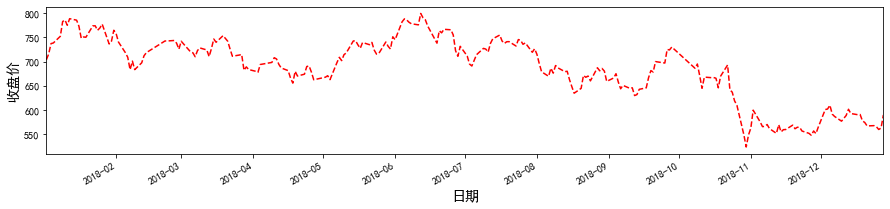

In [18]:
quotes['close'].plot(figsize=(15,3),style='r--')
plt.tick_params('both',labelsize=10)
plt.xlabel('日期',fontsize=14)
plt.ylabel('收盘价',fontsize=14)

# 计算对数收益率
收益率公式为$$\frac{p_t-p_{t-1}}{p_{t-1}}$$

对数收益率则加个用np.log（p（t）/p(t-1))

## 新生成一列ret

In [19]:
quotes['ret']=0
quotes.head(3)

,ts_code,open,high,low,close,vol,ret
trade_date,,,,,,,
2018-01-02,600519.SH,700.0,710.16,689.89,703.85,49612.48,0
2018-01-03,600519.SH,701.5,721.40,699.74,715.86,52019.41,0
2018-01-04,600519.SH,721.4,743.50,719.33,737.07,72205.08,0


## 传统方法
得到结果需要耗费很长时间，不建议使用


In [17]:
import tushare as ts
pro=ts.pro_api('5f2dc9d17ebed3601a4fbea74148a25067d067138bf88515693e9b7d')
quotes=pro.daily(ts_code='600519.SH', start_date='20090101', end_date='20190101',fields=('trade_date','open','close','high','low','vol','ts_code'))
quotes['trade_date']=pd.to_datetime(quotes['trade_date'])
quotes.set_index('trade_date',inplace=True)     #将日期变成列索引，有利于后期x轴刻度的调整
quotes.sort_index(ascending=True,inplace=True)     #正序排序
quotes.head()

,ts_code,open,high,low,close,vol
trade_date,,,,,,
2009-01-05,600519.SH,109.50,111.08,107.00,108.38,13505.50
2009-01-06,600519.SH,107.50,109.20,105.28,108.71,38154.08
2009-01-07,600519.SH,108.92,109.00,106.70,106.79,15238.02
2009-01-08,600519.SH,105.25,108.57,104.20,108.53,18634.67
2009-01-09,600519.SH,107.58,108.55,107.00,107.29,11800.16


In [ ]:
quotes['ret']=0
for i in range(1,quotes.shape[0]):
    quotes['ret'][i]=np.log(quotes['close'][i]/quotes['close'][i-1])
quotes['ret']

## 用shift的方法
shift（1）可以得到向后移动一位的数据

In [49]:
quotes['ret']=0
quotes['ret']=np.log(quotes['close']/quotes['close'].shift(1))
quotes.head(3)

,ts_code,open,high,low,close,vol,ret
trade_date,,,,,,,
2015-01-05,600519.SH,189.62,204.24,188.69,202.52,94515.17,NaN
2015-01-06,600519.SH,200.00,202.56,196.02,197.83,55020.01,-0.023431
2015-01-07,600519.SH,196.04,199.50,189.99,192.94,54797.84,-0.025029


## 作图

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001AECDF28>,
      dtype=object)

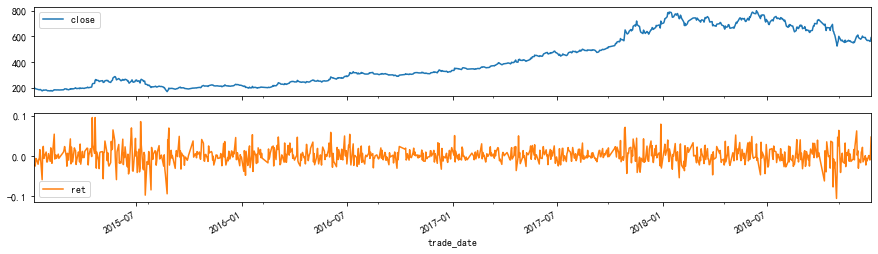

In [50]:
quotes[['close','ret']].plot(subplots=True,figsize=(15,4))

# 移动平均

In [63]:
quotes['30d']=quotes['close'].rolling(window=20,center=True).mean()
quotes['50d']=quotes['close'].rolling(window=50,center=True).mean()
quotes[30:35]

,ts_code,open,high,low,close,vol,ret,30d,50d
trade_date,,,,,,,,,
2015-02-16,600519.SH,182.54,183.63,181.22,183.31,39521.08,0.004483,182.7835,185.6664
2015-02-17,600519.SH,183.55,183.89,181.91,182.22,34172.55,-0.005964,183.6205,185.8732
2015-02-25,600519.SH,183.00,185.70,181.11,183.96,59935.12,0.009504,184.0935,186.0948
2015-02-26,600519.SH,183.80,188.39,183.55,186.64,62297.72,0.014463,184.8300,186.3380
2015-02-27,600519.SH,186.90,194.50,186.80,191.05,63370.94,0.023354,185.7650,186.5082


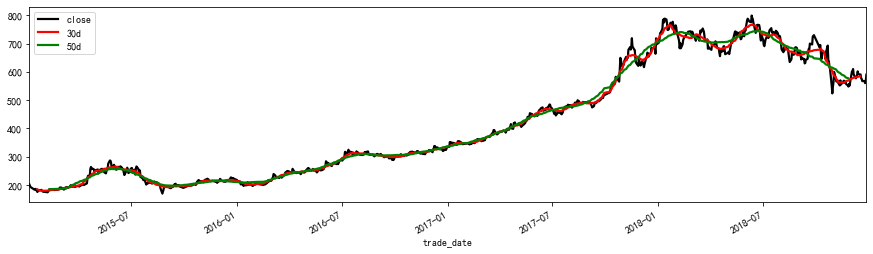

In [78]:
quotes[['close','30d','50d']].plot(figsize=(15,4),color=['k','r','g'],linewidth=2.2)

# 时间序列

## 构造时间序列

In [5]:
df=pd.DataFrame(np.random.randn(1000,1),index=pd.date_range('20190101',periods=1000),columns=['data'])
df.head(3)

,data
2019-01-01,-0.081153
2019-01-02,-0.039065
2019-01-03,0.092245


## 差分处理

### diff(1)   一阶差分
等价于   #df['diff_1']=df['data']-df['data'].shift(1)

In [6]:
df['diff_1']=df['data'].diff(1)
df.head(3)

,data,diff_1
2019-01-01,-0.081153,NaN
2019-01-02,-0.039065,0.042089
2019-01-03,0.092245,0.131310


In [7]:
df['diff_1']=df['data']-df['data'].shift(1)
df.head(3)

,data,diff_1
2019-01-01,-0.081153,NaN
2019-01-02,-0.039065,0.042089
2019-01-03,0.092245,0.131310


### 二阶差分

In [8]:
df['diff_2']=df['diff_1'].diff(1)
df.head(3)

,data,diff_1,diff_2
2019-01-01,-0.081153,NaN,NaN
2019-01-02,-0.039065,0.042089,NaN
2019-01-03,0.092245,0.131310,0.089221


### 查看图像

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001C3BFB70>,
      dtype=object)

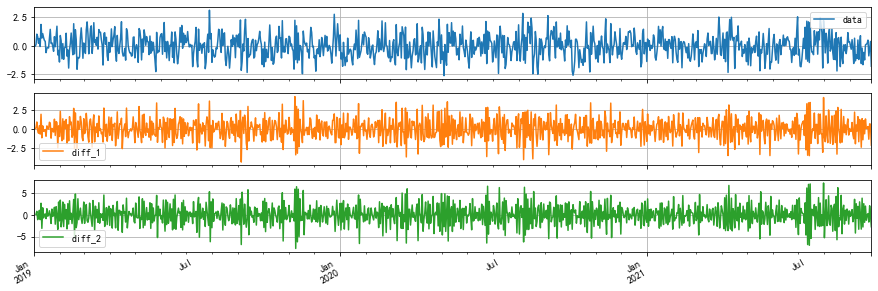

In [14]:
df.plot(subplots=True,figsize=(15,5),grid=0.5)

# 股票数据分析

ARIMA的一个优化版就是季节性ARIMA。它像Holt-Winters季节性预测模型一样，也把数据集的季节性考虑在内。

import statsmodels.api as sm

fit1 = sm.tsa.statespace.SARIMAX(train.Count, order=(2, 1, 4), seasonal_order=(0, 1, 1, 7)).

##   数取处理

In [3]:
import tushare as ts
pro=ts.pro_api('5f2dc9d17ebed3601a4fbea74148a25067d067138bf88515693e9b7d')
quotes=pro.daily(ts_code='600519.SH', start_date='20070101', end_date='20170201',fields=('trade_date','open','close','high','low','vol','ts_code'))
quotes['trade_date']=pd.to_datetime(quotes['trade_date'])
quotes.set_index('trade_date',inplace=True)     #将日期变成列索引，有利于后期x轴刻度的调整
quotes.sort_index(ascending=True,inplace=True)     #正序排序
quotes.head(3)

,ts_code,open,high,low,close,vol
trade_date,,,,,,
2007-01-04,600519.SH,90.01,90.18,85.50,85.84,44664.67
2007-01-05,600519.SH,84.79,86.69,83.30,86.27,27805.01
2007-01-08,600519.SH,86.30,86.60,83.88,84.86,48923.59


### 可视化

Text(0.5, 0, '日期')

Text(0, 0.5, '收盘价')

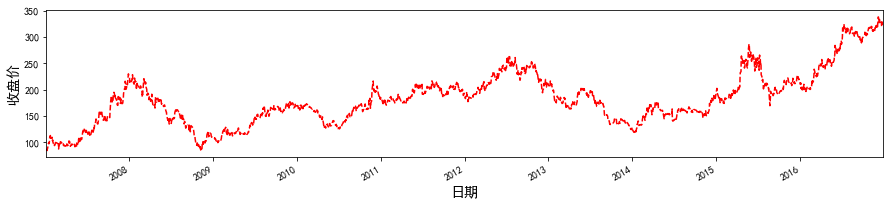

In [4]:
quotes['close'].plot(figsize=(15,3),style='r--')
plt.tick_params('both',labelsize=10)
plt.xlabel('日期',fontsize=14)
plt.ylabel('收盘价',fontsize=14)

### 重采样--按周一
要求df的index索引必须为datetime.datetime类型的，才可以按日期进行重采样

In [4]:
stock_s=quotes['close'].resample('W-MON').mean()
stock_s.head(3)

trade_date
2007-01-08     85.656667
2007-01-15     93.264000
2007-01-22    104.724000
Freq: W-MON, Name: close, dtype: float64

$$补充$$
1,acf()

功能：计算自相关系数

使用方法：

autoaorr = acf(data, unbiased=False,nlags=40,qstat=False,fft=False,alpha=None)

输入的data为观测值序列（即时间序列，可以是DataFrame或者是Series），返回参数autocorr为观测值序列自相关函数。其余为可选参数，如qstat=True时同时返回Q统计量和对应的p值

2，plot_acf()

功能：绘制自相关系数图

使用方法：

 p = plot_acf(data)

返回matplotlib对象，调用show()方法显示

3，pacf()/plot_pacf()与上面两个一致

## 选取训练数据

In [5]:
stock_train=stock_s['2014':'2016']  

## 平稳性检验

### 观察法
观察图像的走势，判断是否平稳，下图不平稳

Text(0.5, 0, '日期')

Text(0, 0.5, '测试数据')

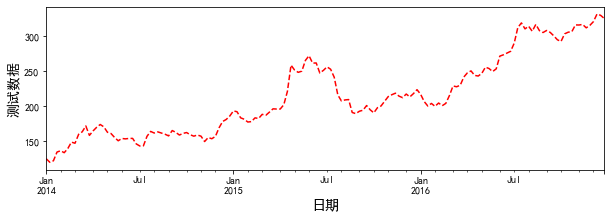

In [7]:
stock_train.plot(figsize=(10,3),style='r--')
plt.tick_params('both',labelsize=10)
plt.xlabel('日期',fontsize=14)
plt.ylabel('测试数据',fontsize=14)

### ADF检验
返回值依次为adf、pvalue、usedlag、nobs、critical values、icbest、regresults、resstore

 adf值> 1%对应的值，不拒绝原假设，则存在单位根，即不平稳

In [35]:
from statsmodels.tsa.stattools import adfuller as ADF
ADF(stock_train)


(-1.031082039278574,
 0.7417597435266678,
 5,
 150,
 {'1%': -3.474714913481481,
  '5%': -2.881008708148148,
  '10%': -2.5771508444444446},
 959.2020112437162)

## 平稳化处理--ARIMA（p，q，d）
确定为arima（1,1，1）

平稳化处理方法1：对数据进行取对数后，再进行模型建立（要求数据必须大于0才可以）

平稳化处理方法2：差分法

其它方法：参考https://www.cnblogs.com/foley/p/5582358.html

###  对数法

Text(0.5, 1.0, '对数处理')

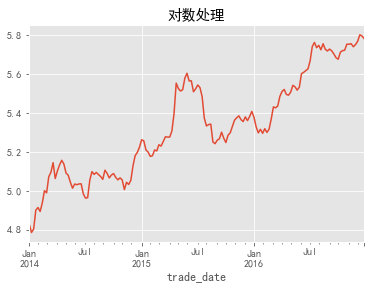

In [100]:
ts_log = np.log(stock_train)
ts_log.plot()
plt.title('对数处理')

Text(0.5, 1.0, '对数处理一阶差分图')

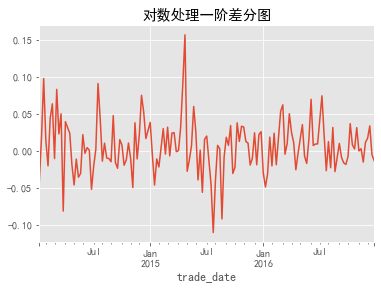

In [102]:
diff_1=ts_log.diff(1)
diff=diff_1.dropna()  #删掉  NAN
diff.plot()
plt.title('对数处理一阶差分图')

In [7]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from matplotlib.pylab import style
style.use('ggplot')  #设置图片显示的主题风格

### 进行差分  --定d
一阶差分基本上是平稳了，除了个别变化比较大的

Text(0.5, 1.0, '一阶差分图')

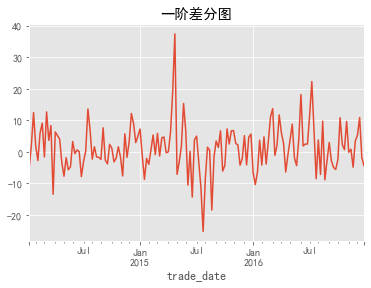

In [48]:
diff_1=stock_train.diff(1)
diff=diff_1.dropna()  #删掉  NAN
diff.plot()
plt.title('一阶差分图')

### 一阶差分ACF--定q
MA（1）

Text(0.5, 1.0, 'ACF图')

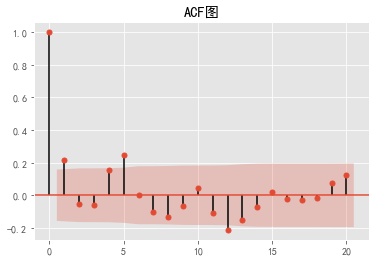

In [49]:
acf=plot_acf(diff,lags=20)
plt.title('ACF图')

### 一阶差分PACF--定p
AR（1）

Text(0.5, 1.0, 'PACF图')

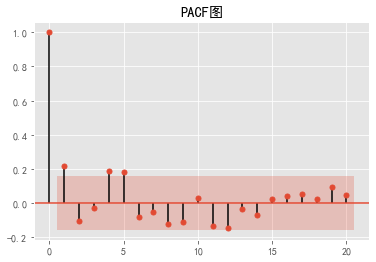

In [50]:
acf=plot_pacf(diff,lags=20)
plt.title('PACF图')

## 建立模型
order为模型的阶数，freq为数据的频率

In [8]:
model=ARIMA(stock_train,order=(1,1,1),freq='W-MON')

## 拟合模型
AIC和BIC比较小的时候，数据的结果要更好一些

In [9]:
arima_result=model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                  155
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -527.302
Method:                       css-mle   S.D. of innovations              7.263
Date:                Sun, 26 Jan 2020   AIC                           1062.604
Time:                        21:13:47   BIC                           1074.778
Sample:                    01-13-2014   HQIC                          1067.549
                         - 12-26-2016                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.2763      0.718      1.777      0.078      -0.132       2.684
ar.L1.D.close    -0.0179      0.256     -0.070      0.944      -0.520       0.484
ma.L1.D.close     0.2547      0.242      1.053      0.294      -0.219       0.729
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -55.9966           +0.0000j           55.9966            0.5000
MA.1           -3.9256           +0.0000j            3.9256            0.5000
-----------------------------------------------------------------------------
"""

## 预测
当原始数据stock_s，分为stock_train和另一部分时，

本例中原始数据为20070101到20170201

20140101到20161226为测试集，剩余部分可以为预测集

In [59]:
stock_s.tail(6)

trade_date
2016-12-26    324.970000
2017-01-02    327.835000
2017-01-09    346.496000
2017-01-16    345.568000
2017-01-23    353.028000
2017-01-30    347.453333
Freq: W-MON, Name: close, dtype: float64

In [60]:
stock_train.tail()

trade_date
2016-11-28    315.028
2016-12-05    320.352
2016-12-12    331.240
2016-12-19    329.374
2016-12-26    324.970
Freq: W-MON, Name: close, dtype: float64

### forecasts 预测--Out-of-sample 
a,b,c = arima.forecast(num)
预测试验数据往后num天，样本外进行预测
输入参数num为要预测的天数，arima为已经建立好的ARIMA模型。a为返回天数的预测值，b为预测的误差，c为预测的置信区间

In [55]:
model=ARIMA(stock_train,order=(1,1,1),freq='W-MON')
arima_result=model.fit()
arima_result.forecast(5)

(array([325.22609616, 326.52065895, 327.79667656, 329.07302536,
        330.34936825]),
 array([ 7.26321261, 11.55254424, 14.61564895, 17.1400973 , 19.33774808]),
 array([[310.99046103, 339.4617313 ],
        [303.87808832, 349.16322958],
        [299.15053101, 356.44282211],
        [295.47905197, 362.66699875],
        [292.44807846, 368.25065803]]))

### predict- 可预测两种情况
当原始数据stock_s，分为stock_train和另一部分时，本例中20070101`20170201,20140101到20161226为测试集，剩余部分可以为预测集

但start和end中填入的日期必须是stock_s中的

#### dynamic=True---Out-of-sample
表示在样本外（预测集中）进行预测,要求start中的日期必须在样本内，end中的日期可在样本外

In [10]:
stock_train.tail()

trade_date
2016-11-28    315.028
2016-12-05    320.352
2016-12-12    331.240
2016-12-19    329.374
2016-12-26    324.970
Freq: W-MON, Name: close, dtype: float64

In [66]:
stock_s.tail(5)

trade_date
2017-01-02    327.835000
2017-01-09    346.496000
2017-01-16    345.568000
2017-01-23    353.028000
2017-01-30    347.453333
Freq: W-MON, Name: close, dtype: float64

In [13]:
model=ARIMA(stock_train,order=(1,1,1),freq='W-MON')
arima_result=model.fit()
pre_vals=arima_result.predict(start='20170102',end='20170206', typ='levels',dynamic=True) #end的数据在样本外
pre_vals

2017-01-02    325.226096
2017-01-09    326.520659
2017-01-16    327.796677
2017-01-23    329.073025
2017-01-30    330.349368
2017-02-06    331.625711
Freq: W-MON, dtype: float64

#### dynamic=False--in-sample
表示在样本内（测试集中）进行预测

In [70]:
stock_s['2016-12']

trade_date
2016-12-05    320.352
2016-12-12    331.240
2016-12-19    329.374
2016-12-26    324.970
Freq: W-MON, Name: close, dtype: float64

In [71]:
model=ARIMA(stock_train,order=(1,1,1),freq='W-MON')
arima_result=model.fit()
pre_vals=arima_result.predict(start='20161205',end='20161226', typ='levels',dynamic=False)
pre_vals

trade_date
2016-12-05    317.205632
2016-12-12    322.357553
2016-12-19    334.607378
2016-12-26    329.373328
Freq: W-MON, dtype: float64

In [72]:
stock_s['2016-12']-pre_vals

trade_date
2016-12-05    3.146368
2016-12-12    8.882447
2016-12-19   -5.233378
2016-12-26   -4.403328
Freq: W-MON, dtype: float64

#### typ参数
typ='levels'为预测的数据
 typ='linear'为内生变量差分的线性预测

In [73]:
model=ARIMA(stock_train,order=(1,1,1),freq='W-MON')
arima_result=model.fit()
pre_vals=arima_result.predict(start='20161205',end='20161226', typ='linear',dynamic=False)
pre_vals

trade_date
2016-12-05    2.177632
2016-12-12    2.005553
2016-12-19    3.367378
2016-12-26   -0.000672
Freq: W-MON, dtype: float64

## 绘制图形

In [75]:
model=ARIMA(stock_train,order=(1,1,1),freq='W-MON')
arima_result=model.fit()
pre_vals=arima_result.predict(start='20170102',end='20170130', typ='levels',dynamic=True)


<Figure size 1440x576 with 0 Axes>

Text(0.5, 1.0, '真实值VS预测值')

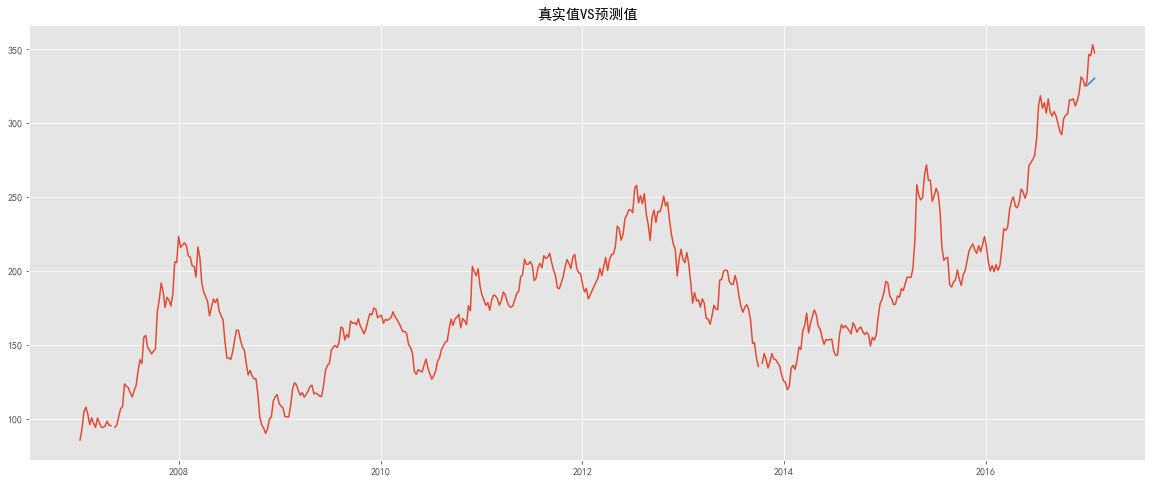

In [81]:
plt.figure(figsize=(20,8))
forcast_real=pd.concat([stock_s,pre_vals],axis=1,keys=['true','predict'])
plt.plot(forcast_real)
plt.title('真实值VS预测值')

In [94]:
stock_s.head()

trade_date
2007-01-08     85.656667
2007-01-15     93.264000
2007-01-22    104.724000
2007-01-29    107.962000
2007-02-05    103.196000
Freq: W-MON, Name: close, dtype: float64

In [90]:
stock_s['2013-01'].head()

trade_date
2013-01-07    205.615
2013-01-14    212.494
2013-01-21    204.610
2013-01-28    192.264
Freq: W-MON, Name: close, dtype: float64

<Figure size 1440x576 with 0 Axes>

Text(0.5, 1.0, '真实值VS预测值')

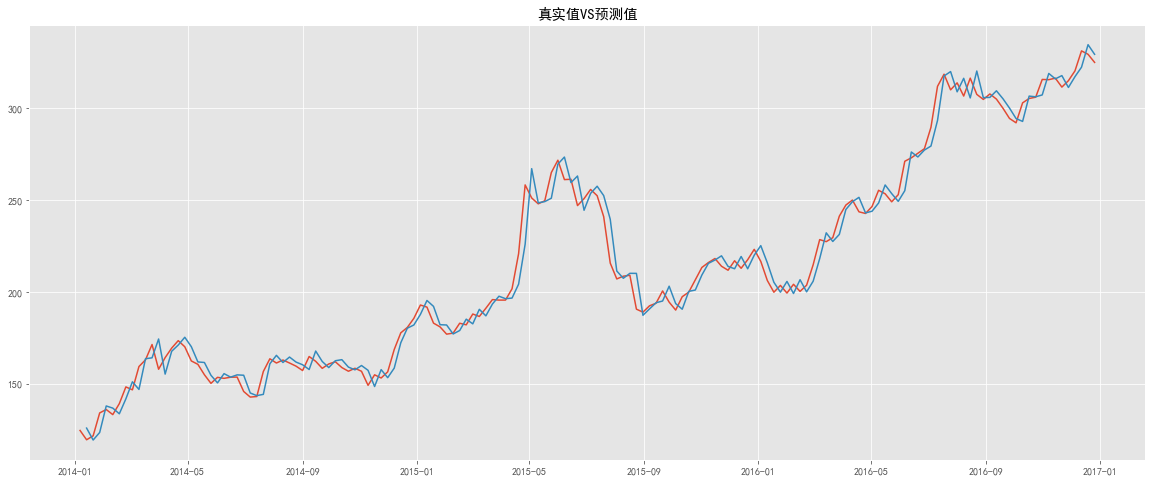

In [96]:
model=ARIMA(stock_train,order=(1,1,1),freq='W-MON')
arima_result=model.fit()
pre_vals=arima_result.predict(typ='levels')
plt.figure(figsize=(20,8))
forcast_real=pd.concat([stock_train,pre_vals],axis=1,keys=['true','predict'])
plt.plot(forcast_real)
plt.title('真实值VS预测值')
